# Загрузка Pandas и очистка данных

In [871]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [872]:
df = pd.read_csv('main_task.csv')


In [873]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [875]:
#НУЛИ
df['Number of Reviews']=df['Number of Reviews'].fillna(0)

In [876]:
# ПОКА ТАК
df=df.drop(['URL_TA','ID_TA'],axis=1)

# Price Range

In [877]:
df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [878]:
display(df['Price Range'].isnull().sum())

13886

In [879]:
def level_of_prices(string):
    if str(string)=='nan':
        level=0
    else:
        if len(string)==1:
            level=1
        elif len(string)==4:
            level=3
        else:
            level=2
    return level

In [880]:
df['how_expensive']=df['Price Range'].apply(level_of_prices)
display(df.head(2))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,how_expensive
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",2
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",0


In [881]:
unique_cities=df['City'].unique()
display(unique_cities, len(unique_cities))

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

31

In [882]:
# Создаём данные для заполнения пропущенных цен:
cities=df['City']
average_price_level_by_city={}

for city in cities:
    mean_price=df[(df['City']==city) & (df['how_expensive']!=0)]['how_expensive'].mean()
    average_price_level_by_city.update({city:round(mean_price,2)})
    
print(average_price_level_by_city)  

{'Paris': 1.9, 'Stockholm': 1.94, 'London': 1.8, 'Berlin': 1.75, 'Munich': 1.91, 'Oporto': 1.68, 'Milan': 1.74, 'Bratislava': 1.84, 'Vienna': 1.85, 'Rome': 1.72, 'Barcelona': 1.78, 'Madrid': 1.85, 'Dublin': 1.77, 'Brussels': 1.86, 'Zurich': 1.97, 'Warsaw': 1.81, 'Budapest': 1.71, 'Copenhagen': 1.9, 'Amsterdam': 1.84, 'Lyon': 1.89, 'Hamburg': 1.87, 'Lisbon': 1.73, 'Prague': 1.73, 'Oslo': 1.94, 'Helsinki': 1.83, 'Edinburgh': 1.71, 'Geneva': 2.05, 'Ljubljana': 1.78, 'Athens': 1.72, 'Luxembourg': 1.99, 'Krakow': 1.65}


In [883]:
def swap_zeros(price, city):
    if price==0:
        return average_price_level_by_city[city]
    else:
        return price

In [884]:
# Заполняем значения в DF

df['how_expensive']=df.apply(lambda x: swap_zeros(x['how_expensive'],x['City']),axis=1)


In [885]:
display(df[['City','how_expensive']])

,City,how_expensive
0,Paris,2.00
1,Stockholm,1.94
2,London,3.00
3,Berlin,1.75
4,Munich,2.00
...,...,...
39995,Milan,2.00
39996,Paris,2.00
39997,Stockholm,1.94
39998,Warsaw,2.00


In [886]:
df[['how_expensive','Rating']].corr()

,how_expensive,Rating
how_expensive,1.000000,-0.021134
Rating,-0.021134,1.000000


# Cities

In [887]:
# Города уйдут в DUMMY-переменные
# Их не так уж много, все в Европе, можно и не группировать:

dummy=pd.get_dummies(df.City,columns=['City'],prefix='',prefix_sep='')

In [888]:
df=pd.concat([df,dummy],axis=1)

In [889]:
display(df.shape)

(40000, 40)

In [890]:
#Количество ресторанов в городе, участвующих в рейтинге?

In [891]:
restaurants=df.groupby(['City'])['Restaurant_id'].count()
restaurants_df=restaurants.reset_index()
restaurants_df=restaurants_df.set_index('City')
display(restaurants_df.head(5))

,Restaurant_id
City,
Amsterdam,1086
Athens,628
Barcelona,2734
Berlin,2155
Bratislava,301


In [892]:
restaurants_df=restaurants_df.T
display(restaurants_df.head(5))

City,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
Restaurant_id,1086,628,2734,2155,301,1060,816,659,673,596,481,949,376,443,1300,183,5757,210,892,3108,2133,893,513,385,4897,1443,2078,820,1166,727,538


In [893]:
rest_disct=restaurants_df.to_dict(orient='records')
display(rest_disct)

[{'Amsterdam': 1086,
  'Athens': 628,
  'Barcelona': 2734,
  'Berlin': 2155,
  'Bratislava': 301,
  'Brussels': 1060,
  'Budapest': 816,
  'Copenhagen': 659,
  'Dublin': 673,
  'Edinburgh': 596,
  'Geneva': 481,
  'Hamburg': 949,
  'Helsinki': 376,
  'Krakow': 443,
  'Lisbon': 1300,
  'Ljubljana': 183,
  'London': 5757,
  'Luxembourg': 210,
  'Lyon': 892,
  'Madrid': 3108,
  'Milan': 2133,
  'Munich': 893,
  'Oporto': 513,
  'Oslo': 385,
  'Paris': 4897,
  'Prague': 1443,
  'Rome': 2078,
  'Stockholm': 820,
  'Vienna': 1166,
  'Warsaw': 727,
  'Zurich': 538}]

In [894]:
rest_disct[0]['Lyon']

892

In [895]:
df['Nr_restaurants']=df['City'].apply(lambda x:rest_disct[0][x])
display(df[['City','Nr_restaurants']].head(5))

,City,Nr_restaurants
0,Paris,4897
1,Stockholm,820
2,London,5757
3,Berlin,2155
4,Munich,893


In [896]:
df[['Nr_restaurants','Rating','Ranking']].corr()

,Nr_restaurants,Rating,Ranking
Nr_restaurants,1.000000,-0.061376,0.709115
Rating,-0.061376,1.000000,-0.368371
Ranking,0.709115,-0.368371,1.000000


In [897]:
# Количество ресторанов сильно скоррелировано с Ranking
# Превратим их в один признак

In [898]:
df['Ranking']=df['Ranking']/df['Nr_restaurants']

In [899]:
display(df[['Ranking','Nr_restaurants']].head(2))

,Ranking,Nr_restaurants
0,1.137431,4897
1,1.874390,820


In [900]:
# Промежуточный признак СТРАНА

In [901]:
countries_df = pd.read_csv('countries_transposed.csv',index_col=False)

In [902]:
display(countries_df.head())

,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Sofia,Stockholm,Vienna,Warsaw,Zurich
0,Netherlands,Greece,Spain,Germany,Slovakia,Belgium,Hungary,Denmark,Ireland,United Kingdom,Switzerland,Germany,Finland,Poland,Portugal,Slovenia,United Kingdom,Luxembourg,France,Spain,Italy,Germany,Portugal,Norway,France,Czechia,Italy,Bulgaria,Sweden,Austria,Poland,Switzerland


In [903]:
countries_dict=countries_df.iloc[:32].to_dict(orient='records')
display(countries_dict)

[{'Amsterdam': 'Netherlands',
  'Athens': 'Greece',
  'Barcelona': 'Spain',
  'Berlin': 'Germany ',
  'Bratislava': 'Slovakia',
  'Brussels': 'Belgium',
  'Budapest': 'Hungary',
  'Copenhagen': 'Denmark',
  'Dublin': 'Ireland',
  'Edinburgh': 'United Kingdom',
  'Geneva': 'Switzerland',
  'Hamburg': 'Germany ',
  'Helsinki': 'Finland',
  'Krakow': 'Poland',
  'Lisbon': 'Portugal',
  'Ljubljana': 'Slovenia',
  'London': 'United Kingdom',
  'Luxembourg': 'Luxembourg',
  'Lyon': 'France',
  'Madrid': 'Spain',
  'Milan': 'Italy',
  'Munich': 'Germany ',
  'Oporto': 'Portugal',
  'Oslo': 'Norway',
  'Paris': 'France',
  'Prague': 'Czechia',
  'Rome': 'Italy',
  'Sofia': 'Bulgaria',
  'Stockholm': 'Sweden',
  'Vienna': 'Austria',
  'Warsaw': 'Poland',
  'Zurich': 'Switzerland'}]

In [904]:
df['Country']=df['City'].apply(lambda x:countries_dict[0][x])
display(df[['City','Country']].head(5))

,City,Country
0,Paris,France
1,Stockholm,Sweden
2,London,United Kingdom
3,Berlin,Germany
4,Munich,Germany


In [905]:
# Этот промежуточный признак нам было нужен, чтобы подгрузить данные по турпотоку, выраженному в туристокроватях за 2016 год
# Данные взяты вот отсюда https://ec.europa.eu/eurostat/databrowser/view/tour_occ_ninat/default/table?lang=en


In [906]:
bednights2016_df = pd.read_csv('bednights2016_transposed.csv',index_col=False)
display(bednights2016_df)

,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Serbia,Turkey
0,17.063194,16.150666,24.268149,11.630004,79.946914,4.014581,16.190381,87.91285,294.556428,123.91341,72.064582,199.421814,14.504702,3.044532,3.27342,2.637701,13.802045,8.622438,39.623541,83.398372,15.579225,43.959295,4.81205,7.25207,5.038214,5.771275,13.997265,279.453071,6.764038,0.127747,9.672993,23.982739,10.528475,1.050917,2.735528,65.793316


In [907]:
bednights2016_dict=bednights2016_df.to_dict(orient='records')
display(bednights2016_dict)

[{'Belgium': 17.063194,
  'Bulgaria': 16.150666,
  'Czechia': 24.268148999999998,
  'Denmark': 11.630004,
  'Germany ': 79.946914,
  'Estonia': 4.014581,
  'Ireland': 16.190381,
  'Greece': 87.91285,
  'Spain': 294.556428,
  'France': 123.91341000000001,
  'Croatia': 72.064582,
  'Italy': 199.42181399999998,
  'Cyprus': 14.504701999999998,
  'Latvia': 3.044532,
  'Lithuania': 3.27342,
  'Luxembourg': 2.637701,
  'Hungary': 13.802045000000001,
  'Malta': 8.622438,
  'Netherlands': 39.623540999999996,
  'Austria': 83.398372,
  'Poland': 15.579225,
  'Portugal': 43.959295000000004,
  'Romania': 4.81205,
  'Slovenia': 7.25207,
  'Slovakia': 5.038214,
  'Finland': 5.771275,
  'Sweden': 13.997264999999999,
  'United Kingdom': 279.453071,
  'Iceland': 6.764038,
  'Liechtenstein': 0.127747,
  'Norway': 9.672993,
  'Switzerland': 23.982739000000002,
  'Montenegro': 10.528475,
  'North Macedonia': 1.050917,
  'Serbia': 2.735528,
  'Turkey': 65.793316}]

In [908]:
df['bednighte2016']=df['Country'].apply(lambda x:bednights2016_dict[0][x])
display(df.head(5))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,how_expensive,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country,bednighte2016
0,id_5569,Paris,"['European', 'French', 'International']",1.137431,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4897,France,123.913410
1,id_1535,Stockholm,NaN,1.874390,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,820,Sweden,13.997265
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0.061317,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5757,United Kingdom,279.453071
3,id_3456,Berlin,NaN,1.604640,5.0,NaN,3.0,"[[], []]",1.75,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2155,Germany,79.946914
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",0.695409,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,893,Germany,79.946914


In [909]:
df[['bednighte2016','Rating']].corr()

,bednighte2016,Rating
bednighte2016,1.000000,-0.065891
Rating,-0.065891,1.000000


# Cuisine

In [910]:
cusines=df['Cuisine Style'] 
nonunique_cusines=[] # Промежуточный список
variety_count=[]

for item in cusines:
    if str(item)=='nan':
        item=0
        variety_count.append(1)
    else:
        string_to_list=item[1:-1].split(', ')
        variety_count.append(len(string_to_list))
        
        for string in string_to_list:
            word=string.strip("''")
            nonunique_cusines.append(word)

In [911]:
# function to get unique values 
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list

In [912]:
list_un_cusines=unique(nonunique_cusines) #Список уникальных значений Cuisine

In [913]:
def variety(string):        #Считает количество представленных в каждом ресторане кухонь
    variety_count=0
    if str(string)=='nan':
        variety_count=1         # заодно избавимся от нулей: там, где кухня не указана, будем считать, она одна - неопределённая
    else:
        string_to_list=string[1:-1].split(', ')
        variety_count=len(string_to_list)
        #print(string_to_list)
    return variety_count

In [914]:
# НОВЫЙ ПРИЗНАК: РАЗНООБРАЗИЕ

df['Cusine_variety']=df['Cuisine Style'].apply(variety)
display(df.head(2))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,how_expensive,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country,bednighte2016,Cusine_variety
0,id_5569,Paris,"['European', 'French', 'International']",1.137431,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4897,France,123.913410,3
1,id_1535,Stockholm,NaN,1.874390,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,820,Sweden,13.997265,1


In [915]:
df[['Cusine_variety','Rating']].corr()

,Cusine_variety,Rating
Cusine_variety,1.000000,0.120059
Rating,0.120059,1.000000


In [916]:
variety_by_city=df[['City','Cusine_variety','Rating']]#.groupby('City')['Cusine_variety'].mean()
top_ranking=variety_by_city.groupby('City',sort=False)['Rating'].mean()
top_ranking=top_ranking.sort_values(ascending=False)
display(top_ranking.head(8))

City
Rome         4.230269
Athens       4.230096
Oporto       4.178363
Krakow       4.146727
Amsterdam    4.131215
Berlin       4.124594
Ljubljana    4.112022
Budapest     4.090074
Name: Rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

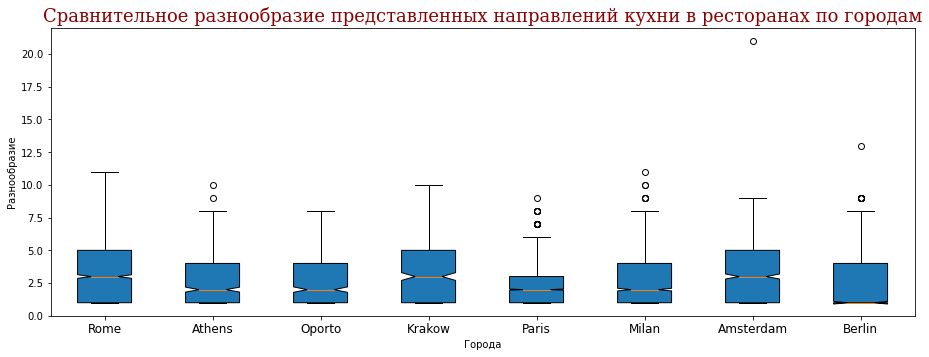

In [917]:
figure_variety=plt.figure()

variety_axes=figure_variety.add_axes([0,0,2,1])

variety_by_city_plot1=variety_by_city['Cusine_variety']

variety1=variety_by_city[variety_by_city['City']=='Rome']['Cusine_variety']
variety2=variety_by_city[variety_by_city['City']=='Athens']['Cusine_variety']
variety3=variety_by_city[variety_by_city['City']=='Oporto']['Cusine_variety']
variety4=variety_by_city[variety_by_city['City']=='Krakow']['Cusine_variety']
variety5=variety_by_city[variety_by_city['City']=='Paris']['Cusine_variety']
variety6=variety_by_city[variety_by_city['City']=='Milan']['Cusine_variety']
variety7=variety_by_city[variety_by_city['City']=='Amsterdam']['Cusine_variety']
variety8=variety_by_city[variety_by_city['City']=='Berlin']['Cusine_variety']

variety_axes.boxplot([variety1,variety2,variety3,variety4,variety5,variety6,variety7,variety8],notch=True,patch_artist=True)
font_t = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18}
        
variety_axes.set_title('Сравнительное разнообразие представленных направлений кухни в ресторанах по городам' ,fontdict=font_t)
variety_axes.set(xlabel='Города', ylabel='Разнообразие')
variety_axes.set_xticklabels(['Rome','Athens','Oporto','Krakow','Paris','Milan','Amsterdam','Berlin'], fontsize=12)
           
plt.show


In [918]:
# Изучение списка направлений кухни, и тот факт, что в датасете присутствуют только европейские города,
# позволяет выделить 4 главных категории направлений кухни:

nutricion_concious=['Kosher',  'Gluten Free Options', 'Halal', 'Healthy',  'Vegetarian Friendly',  'Vegan Options']
                    

ethnic=[ 'Filipino', 'Ethiopian', 'Thai', 'Vietnamese','Malaysian', 'Albanian', 'Cajun & Creole',
        'Indonesian','Colombian', 'Japanese',  'Pakistani', 'Taiwanese', 'Minority Chinese', 'South American', 'Moroccan', 
       'Indian', 'Egyptian', 'Cambodian', 'Armenian', 'Bangladeshi', 'Israeli', 'Lebanese', 'Xinjiang',
        'Middle Eastern', 'Mexican', 'Afghani',  'Tibetan', 'Peruvian', 'Sushi',  'Persian', 'Polynesian', 'Georgian',
         'Uzbek', 'Caribbean',  'Chilean', 'Sri Lankan', 'Tunisian', 'Asian',  'Burmese',  'Nepali', 'Brazilian', 'Mongolian',
         'Venezuelan', 'Cuban', 'Latin',  'Native American','Hawaiian','Azerbaijani', 'Korean', 'Salvadoran', 'Chinese',
         'Singaporean', 'African', 'Ecuadorean',  'Russian', 'Arabic', 'Fujian', 'Yunnan']

european=['French',  'Greek', 'Barbecue', 'Steakhouse','Central European',  'Norwegian','Jamaican', 'Turkish', 
          'Central Asian',  'Scandinavian', 'Romanian',  'Latvian', 'Dutch', 'Swedish', 'Slovenian',  'Canadian',  'Balti',
         'Mediterranean','Danish', 'German',  'American', 'Australian',  'Italian', 'Argentinean',  'Ukrainian',   'Irish',
         'Pub',  'British', 'Welsh', 'Delicatessen', 'Polish', 'Czech', 'Croatian', 'Eastern European', 'Belgian',  'Swiss', 'Hungarian',
          'Portuguese', 'Southwestern', 'Caucasian',  'Austrian', 'Scottish',  'European', 'New Zealand', 'Central American',
         'Spanish']
        

non_specific=['Wine Bar', 'Diner', 'International', 'Fast Food','Street Food',   'Contemporary',  'Brew Pub',  'Fusion', 
             'Cafe',    'Grill', 'Pizza',  'Soups', 'Gastropub',  'Seafood',  'Bar']

#Из этих 4 первое лежит в несколько другой плоскости: осознанное отношениек  составу продуктов, 
# в то время как две другии определяют вкус блюд, а четврётое - формат подачи.

# Вводить все четтыре как отдельные признаки не имеет смысла, так как у нас уже введён признак РАЗНООБРАЗИЕ, 
#и эти четыре вместе будут линейно зависимы с ним.

In [919]:
# В то же время, изучение популярности упоминания nutricion concious направлений наталкивает на мысль, 
# что это тренд в Европе, (в датасете присутствуют только европейские города):

cusines_array=np.array(nonunique_cusines)
popularity_count={}

for un_cus in list_un_cusines:
    popularity_count.update({un_cus:0})

print(len(popularity_count))


for cusine in cusines_array:
    count=popularity_count[cusine]+1
    popularity_count.update({cusine:count})
#print(popularity_count)

df_popular_cusines=pd.DataFrame.from_dict(popularity_count,orient='index',columns=['popularity']).reset_index()
df_popular_cusines.columns=['Cusine','popularity']
popular_df=df_popular_cusines.sort_values(by='popularity', ascending=False)
display(popular_df.head(5))

125


,Cusine,popularity
124,Vegetarian Friendly,11189
122,European,10060
107,Mediterranean,6277
29,Italian,5964
2,Vegan Options,4486


In [920]:
#НОВЫЕ ПРИЗНАКИ

In [921]:
def categorization(cuisine):   
    binary_score=int()    
    if str(cuisine)=='nan':
        binary_score=0    
    else:
        for category in list_to_categorize:
            if str(category).lower() in str(cuisine).lower():
                binary_score=1
    return binary_score

In [922]:
list_to_categorize=nutricion_concious

df['nutricion_concious']=df['Cuisine Style'].apply(categorization)

display(df.head(3))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,how_expensive,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country,bednighte2016,Cusine_variety,nutricion_concious
0,id_5569,Paris,"['European', 'French', 'International']",1.137431,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4897,France,123.913410,3,0
1,id_1535,Stockholm,NaN,1.874390,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,820,Sweden,13.997265,1,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0.061317,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5757,United Kingdom,279.453071,7,1


In [923]:
df[['nutricion_concious','Rating']].corr()

,nutricion_concious,Rating
nutricion_concious,1.000000,0.136089
Rating,0.136089,1.000000


In [924]:
# Исследуем влияние вкусов:

In [925]:
list_to_categorize = european

df['european']=df['Cuisine Style'].apply(categorization)

display(df.head(3))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,how_expensive,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country,bednighte2016,Cusine_variety,nutricion_concious,european
0,id_5569,Paris,"['European', 'French', 'International']",1.137431,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4897,France,123.913410,3,0,1
1,id_1535,Stockholm,NaN,1.874390,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,820,Sweden,13.997265,1,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0.061317,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5757,United Kingdom,279.453071,7,1,0


In [926]:
df[['european','Rating']].corr()

,european,Rating
european,1.000000,0.051122
Rating,0.051122,1.000000


In [927]:
list_to_categorize = ethnic

df['ethnic']=df['Cuisine Style'].apply(categorization)

display(df.head(3))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,how_expensive,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country,bednighte2016,Cusine_variety,nutricion_concious,european,ethnic
0,id_5569,Paris,"['European', 'French', 'International']",1.137431,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4897,France,123.913410,3,0,1,0
1,id_1535,Stockholm,NaN,1.874390,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,820,Sweden,13.997265,1,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0.061317,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5757,United Kingdom,279.453071,7,1,0,1


In [928]:
df[['ethnic','Rating']].corr()

,ethnic,Rating
ethnic,1.000000,-0.009544
Rating,-0.009544,1.000000


In [929]:
list_to_categorize = non_specific

df['non_specific']=df['Cuisine Style'].apply(categorization)

display(df.head(3))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,how_expensive,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country,bednighte2016,Cusine_variety,nutricion_concious,european,ethnic,non_specific
0,id_5569,Paris,"['European', 'French', 'International']",1.137431,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4897,France,123.913410,3,0,1,0,1
1,id_1535,Stockholm,NaN,1.874390,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,820,Sweden,13.997265,1,0,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0.061317,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5757,United Kingdom,279.453071,7,1,0,1,1


In [930]:
df[['non_specific','Rating']].corr()

,non_specific,Rating
non_specific,1.000000,0.024057
Rating,0.024057,1.000000


# Reviews

In [931]:
#Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;


In [932]:
#проблема в том, что их не всегда два.

display(df['Reviews'][1])
display(df['Reviews'][3])
display(df['Reviews'][16])

"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]"

'[[], []]'

"[['This is a real hidden Sushi-gem'], ['04/12/2017']]"

In [933]:
def date1_extraction(string):
    
    date1=(string[2:-2].split('], [')[1]).split(', ')[0].strip("''")
    if len(date1)==0:
        date1=0
    else:
        date1=datetime.strptime(date1,'%m/%d/%Y')
    return date1

In [934]:
def date2_extraction(string):
    
    if len(string[2:-2].split('], [')[1])==0:
        date2=0 
    
    elif len(string[2:-2].split('], [')[1])>12:
        
        date2=datetime.strptime((string[2:-2].split('], [')[1]).split(', ')[1].strip("''"),'%m/%d/%Y')
    else: 
        date2=0
    
    return date2

In [935]:
# Промежуточные признаки

df['review1date']=df['Reviews'].apply(date1_extraction)

df['review2date']=df['Reviews'].apply(date2_extraction)

display(df.iloc[0:5][['Reviews','review1date','review2date']])

,Reviews,review1date,review2date
0,"[['Good food at your doorstep', 'A good hotel ...",2017-12-31 00:00:00,2017-11-20 00:00:00
1,"[['Unique cuisine', 'Delicious Nepalese food']...",2017-07-06 00:00:00,2016-06-19 00:00:00
2,"[['Catch up with friends', 'Not exceptional'],...",2018-01-08 00:00:00,2018-01-06 00:00:00
3,"[[], []]",0,0
4,"[['Best place to try a Bavarian food', 'Nice b...",2017-11-18 00:00:00,2017-02-19 00:00:00


In [936]:
# Когда люди чаще оставляют отзывы?

In [937]:
df['review_month1']=df['review1date'].apply(lambda x:0 if x==0 else x.strftime("%b"))
display(df[['review_month1','review1date']].head())
df['review_month2']=df['review2date'].apply(lambda x:0 if x==0 else x.strftime("%b"))
display(df[['review_month2','review2date']].head())

,review_month1,review1date
0,Dec,2017-12-31 00:00:00
1,Jul,2017-07-06 00:00:00
2,Jan,2018-01-08 00:00:00
3,0,0
4,Nov,2017-11-18 00:00:00


,review_month2,review2date
0,Nov,2017-11-20 00:00:00
1,Jun,2016-06-19 00:00:00
2,Jan,2018-01-06 00:00:00
3,0,0
4,Feb,2017-02-19 00:00:00


In [938]:
review_months1=df[df['review_month1']!=0].groupby(['review_month1'],sort=False)['Restaurant_id'].count()
review_months1=review_months1.reset_index()
review_months1.columns=['Review_month','Review_count']
review_months1=review_months1.sort_values(by='Review_month', ascending=False)
review_months1=review_months1.set_index('Review_month')
display(review_months1,review_months2.shape)

,Review_count
Review_month,
Sep,2759
Oct,3852
Nov,4164
May,1749
Mar,1216
Jun,1832
Jul,2319
Jan,4716
Feb,1589


(12, 1)

In [939]:
review_months2=df[df['review_month2']!=0].groupby(['review_month2'],sort=False)['Restaurant_id'].count()
review_months2=review_months2.reset_index()
review_months2.columns=['Review_month','Review_count']
review_months2=review_months2.sort_values(by='Review_month', ascending=False)
review_months2=review_months2.set_index('Review_month')
display(review_months2,review_months2.shape)

,Review_count
Review_month,
Sep,2929
Oct,3444
Nov,3408
May,1823
Mar,1407
Jun,1882
Jul,2285
Jan,2445
Feb,1349


(12, 1)

In [940]:
df_month=(review_months2+review_months1).sort_values(by='Review_count', ascending=False).reset_index()
display(df_month)

,Review_month,Review_count
0,Dec,9424
1,Nov,7572
2,Oct,7296
3,Jan,7161
4,Sep,5688
5,Aug,4791
6,Jul,4604
7,Jun,3714
8,May,3572
9,Apr,3119


Text(0.5, 1.1, 'Люди склонны оставлять больше отзывов в зимнее время ')

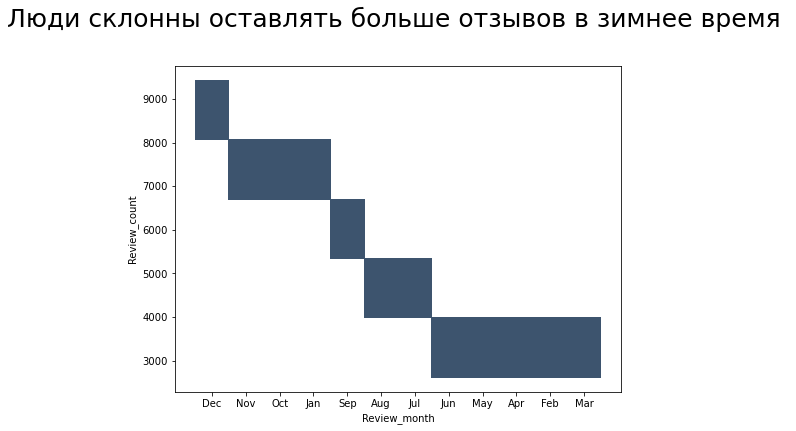

In [941]:
plt.figure(figsize=(8,6))

reveiw_months = sns.histplot(
                            x='Review_month', y='Review_count', 
                           data=df_month
                          ) 
reveiw_months.set_title('Люди склонны оставлять больше отзывов в зимнее время ', y=1.1, fontsize=25)

In [942]:
#НОВЫЕ ПРИЗНАКИ!!!

In [943]:
def age_of_review1(string):
    
    reference_date=datetime(2018,2,26) # за точку отсчёта взята самая свежая дата их предтсавленных
    
    date1=(string[2:-2].split('], [')[1]).split(', ')[0].strip("''")
    if len(date1)==0:
        date1=0
        age1=0
    else:
        date1=datetime.strptime(date1,'%m/%d/%Y')
        age1=(reference_date-date1).days
    return age1

In [944]:
def age_of_review2(string):
    
    reference_date=datetime(2018,2,26) # за точку отсчёта взята самая свежая дата их предтсавленных
    
    if len(string[2:-2].split('], [')[1])==0:
        date2=0 
        age2=0
    elif len(string[2:-2].split('], [')[1])>12:
        
        date2=datetime.strptime((string[2:-2].split('], [')[1]).split(', ')[1].strip("''"),'%m/%d/%Y')
        age2=(reference_date-date2).days
    else: 
        date2=0
        age2=0
    return age2

In [945]:
df['age_of_review1']=df['Reviews'].apply(age_of_review1)

df['age_of_review2']=df['Reviews'].apply(age_of_review2)

display(df.iloc[3:17][['Reviews','age_of_review1','age_of_review2']])

,Reviews,age_of_review1,age_of_review2
3,"[[], []]",0,0
4,"[['Best place to try a Bavarian food', 'Nice b...",100,372
5,"[['There are better 3 star hotel bars', 'Amazi...",163,271
6,"[['Excellent simple local eatery.', 'Excellent...",206,113
7,"[['Wasting of money', 'excellent cuisine'], ['...",1471,2084
8,"[[], []]",0,0
9,"[['Clean efficient staff', 'Nice little pizza ...",111,336
10,"[[], []]",0,0
11,"[['Not bad for Canary Wharf', 'To be a pilgrim...",73,96
12,"[['Great service, good za', 'Lovely, relaxed a...",50,61


In [946]:
display(df['age_of_review1'].mean())

248.9367

In [947]:
# я не буду брать период между датами, так как у нас не всегда даны две даты.

In [948]:
df[df['age_of_review1']!=0]['review1date'].sort_values(ascending=False) # Вот откуда взялась точка отсчёта

5161    2018-02-25
38245   2018-02-25
10525   2018-02-25
35497   2018-02-25
33135   2018-02-25
           ...    
26469   2007-12-28
9346    2007-12-11
6565    2007-11-23
37862   2007-11-21
37913   2004-04-21
Name: review1date, Length: 33505, dtype: datetime64[ns]

In [949]:
df[df['age_of_review2']!=0]['review2date'].sort_values(ascending=False) # Вот откуда взялась точка отсчёта

10690   2018-02-25
36562   2018-02-25
12473   2018-02-25
18511   2018-02-25
36620   2018-02-25
           ...    
3294    2007-12-22
32212   2007-12-19
6175    2007-12-10
34413   2007-12-08
11140   2007-11-14
Name: review2date, Length: 28972, dtype: datetime64[ns]

In [950]:
#заполним пропуски в давности отзывав средними значениями

In [951]:
# там, где не было отзывов- средними значениями
fill_zero_age1 = round(df['age_of_review1'].mean())
fill_zero_age2=round(df['age_of_review2'].mean())
fill_age=int((fill_zero_age1+fill_zero_age2)/2)
display(fill_age)

257

In [952]:
df['age_of_review1']=df['age_of_review1'].apply(lambda x: 257 if x==0 else x)
df['age_of_review2']=df['age_of_review2'].apply(lambda x: 257 if x==0 else x)


In [953]:
def mean_age(age1, age2):
    age=(age1+age2)/2
    return age

In [954]:
df['mean_age_of_review']=df.apply(lambda x:mean_age(x['age_of_review1'],x['age_of_review2']),axis=1)

display(df['mean_age_of_review'].head(2))

0     77.5
1    426.0
Name: mean_age_of_review, dtype: float64

In [955]:
df[['mean_age_of_review','Rating']].corr()

,mean_age_of_review,Rating
mean_age_of_review,1.000000,-0.100474
Rating,-0.100474,1.000000


In [956]:
# Пропробуем оценить тон отзывов

In [957]:
pd.set_option("max_colwidth", 110)

display(df['Reviews'].sample(10))

pd.reset_option("max_colwidth")

6362                                     [['Nice place and good food!'], ['07/30/2016']]
22727                                                                           [[], []]
4579            [['Good for what it offers!', 'Bad food'], ['09/28/2014', '09/01/2014']]
31859                                [['Great for lunch and aperitivo'], ['06/24/2015']]
33366                                                                           [[], []]
6514                                   [['Hidden Gem Near the Airport'], ['08/13/2015']]
22032                     [['excellent libanese food for a nice price'], ['08/19/2016']]
29653                                                        [['Fresg'], ['07/25/2017']]
28870          [['A good Thai fix', 'Very underwhelming'], ['11/10/2017', '10/30/2017']]
2143     [['Best Vegan Brunch!', 'Really good sandwich!'], ['10/29/2017', '09/29/2017']]
Name: Reviews, dtype: object

In [958]:
def match_word(string):
    
    positive=['nice','good','lovely','great','best','amazing','wonderful',
          'favourite','delicious','pleas','beautiful','excellent','fantastic','perfect','tasty']

    negative=['not','low','unfriendly','rude','bad','disappoint','awful','terrible']
    
    score=0

    for good_word in positive:
        if good_word in string.lower():
            score+=1
    for bad_word in negative:
         if good_word in string.lower():
            score+=(-1)
    if score>0:
        score=1 #overall positive
    elif score<0:
        score=-1 #overall negative
    else:
        score=0 # overall neutral
    return score
        
    

In [959]:
df['Tone']=df['Reviews'].apply(match_word)

In [960]:
display(df['Tone'].describe()) #НОВЫЙ ПРИЗНАК

count    40000.000000
mean         0.546575
std          0.560258
min         -1.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Tone, dtype: float64

In [961]:
df[['Tone','Rating']].corr()

,Tone,Rating
Tone,1.000000,0.118647
Rating,0.118647,1.000000


# ID_TA

In [962]:
# Я предполагала, что ID может служить приблизительным индикатором, как давно ресторан зарегистрирован в системе TripAdvisor,
# Попробуем вычленить числовое значение и спосмотреть, скоррелировано ли оно с числом отзывов


In [963]:
#df['ID_TA']=df['ID_TA'].apply(lambda x:int(x[1:len(x)]))

In [964]:
#display(df[['ID_TA','Number of Reviews']])

In [965]:
#df[['ID_TA','Number of Reviews']].corr()

In [966]:
# Он слабо скоррелированы. Попробуем нормализовать эти данные засунуть в модель.


In [967]:
#id_array=np.array(df['ID_TA'])
#mean=np.mean(id_array)
#magnitude=np.linalg.norm(id_array)
#display(mean,magnitude)

In [968]:
#df['ID_TA']=df['ID_TA'].apply(lambda x:(x-mean)/magnitude)

In [969]:
#Увы, они ухудшили модель, так что убираем их

In [970]:
df[['bednighte2016','Ranking','how_expensive','Cusine_variety',
           'nutricion_concious','mean_age_of_review','Tone','Rating']].corr()

,bednighte2016,Ranking,how_expensive,Cusine_variety,nutricion_concious,mean_age_of_review,Tone,Rating
bednighte2016,1.000000,-0.019605,-0.029173,0.003766,0.053052,-0.035619,-0.017102,-0.065891
Ranking,-0.019605,1.000000,-0.145315,-0.540307,-0.551273,0.360095,-0.255205,-0.542702
how_expensive,-0.029173,-0.145315,1.000000,0.120353,0.118212,-0.054848,0.041572,-0.021134
Cusine_variety,0.003766,-0.540307,0.120353,1.000000,0.706082,-0.340689,0.196451,0.120059
nutricion_concious,0.053052,-0.551273,0.118212,0.706082,1.000000,-0.322044,0.181914,0.136089
mean_age_of_review,-0.035619,0.360095,-0.054848,-0.340689,-0.322044,1.000000,-0.001885,-0.100474
Tone,-0.017102,-0.255205,0.041572,0.196451,0.181914,-0.001885,1.000000,0.118647
Rating,-0.065891,-0.542702,-0.021134,0.120059,0.136089,-0.100474,0.118647,1.000000


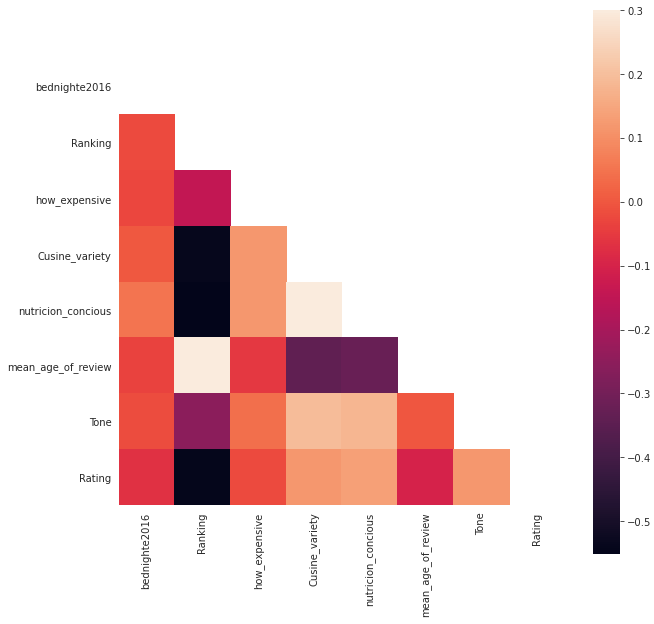

In [971]:

corr = df[['bednighte2016','Ranking','how_expensive','Cusine_variety',
           'nutricion_concious','mean_age_of_review','Tone','Rating']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

# =========================================================

In [972]:
# Избавимся от ненужных столбцов

In [974]:
df=df.drop(['review1date', 'review2date','Cuisine Style',
            'Price Range','City','Reviews','Country','age_of_review1','age_of_review1',
            'Nr_restaurants','review_month1', 'review_month2' ],axis=1)

In [975]:
df.shape

(40000, 45)

In [976]:
RANDOM_SEED = 42

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [977]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [978]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [979]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [980]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [981]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [982]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2054755
